# Bikes Dataset

## This notebook consists of analysis of a bike rental company.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# General Information about the data

In [2]:
bikes = pd.read_csv('data/bikes/train_bikes.csv',parse_dates = ['datetime'])
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


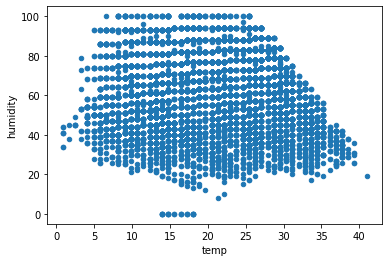

In [4]:
bikes.plot.scatter(x='temp',y='humidity')

In [5]:
#sns.pairplot(bikes)

In [6]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
bikes_test = pd.read_csv('data/bikes/test_bikes.csv', parse_dates = ['datetime'])
bikes_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [8]:
bikes.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
bikes_test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [10]:
print('Number of records = {}.\nNumber of features = {}.'.format(bikes.shape[0],bikes.shape[1]))

Number of records = 10886.
Number of features = 12.


In [11]:
#Checking for null values. False suggests that there are no null values.
bikes.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [12]:
#For the entire dataset we find the count of number of working days vs number of holidays.
bikes.groupby('workingday',axis = 0).count()['count']

workingday
0    3474
1    7412
Name: count, dtype: int64

# Visualization

In [13]:
#Now we will try to plot out  the number of working days vs holidays for an entire year
def workingdayyearplot(year,data,agg = 'sum'):
    df = data[data.datetime.dt.year == year]
    df['hour'] = data.datetime.dt.hour
    df = df.groupby(['hour','workingday'])['count'].agg(agg).unstack()
    plt.figure(figsize = (15,3))
    return df.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year))
   

C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<Figure size 1080x216 with 0 Axes>

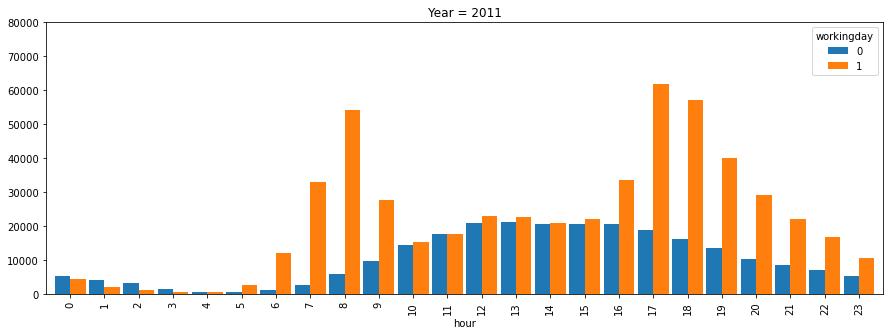

<Figure size 1080x216 with 0 Axes>

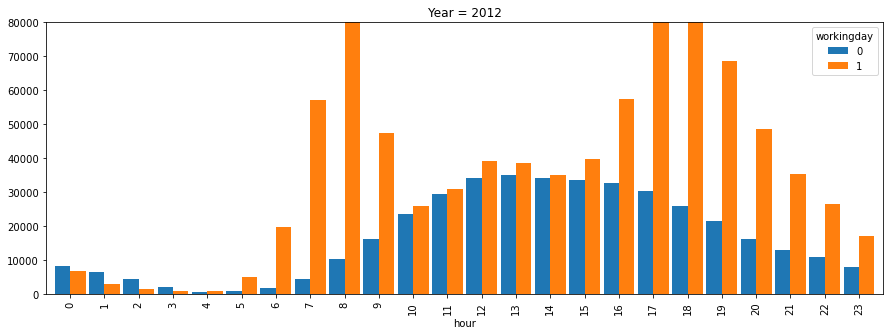

In [14]:
workingdayyearplot(2011,bikes,'sum')
workingdayyearplot(2012,bikes,'sum')

In [15]:
def rentedper(data,agg = 'sum',time = 'month',graph = 'bar'):
    df = data.copy()
    df['month'] = df.datetime.dt.month
    df['year'] = df.datetime.dt.year
    df['hour'] = df.datetime.dt.hour
    df = df.groupby([time,'year'])['count'].agg(agg).unstack()
    df.plot(kind = graph, width = 0.9, figsize = (15,3), title = 'Rented bikes per {} from 2011-12'.format(time))
    pass

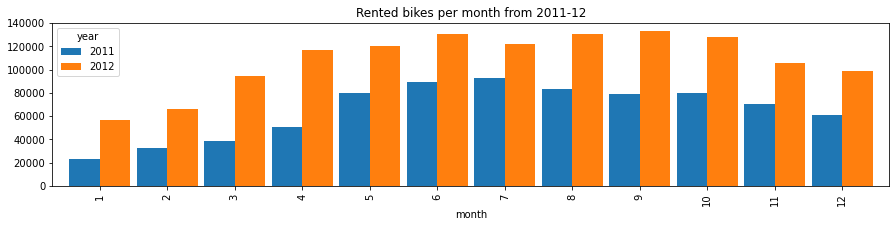

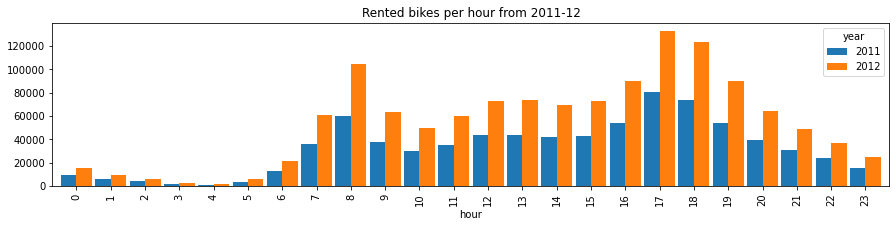

In [16]:
rentedper(bikes)
rentedper(bikes,time = 'hour')

In [17]:
def rentbox(data, message = ''):
    hours = {}
    df = data.copy()
    df['hour'] = data.datetime.dt.hour
    for hour in range(24):
        hours[hour] = df[df.hour == hour]['count'].values
    plt.figure(figsize = (15,3))
    plt.boxplot([hours[hour] for hour in range(24)])
    axis = plt.gca()
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)

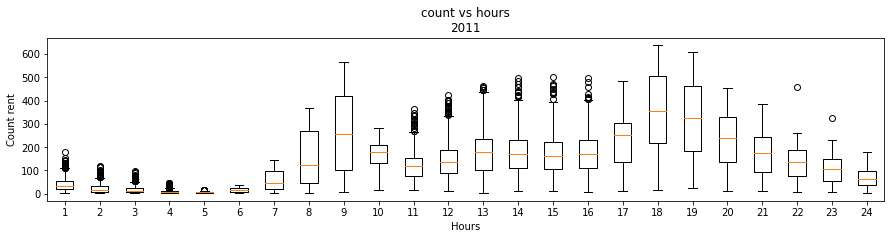

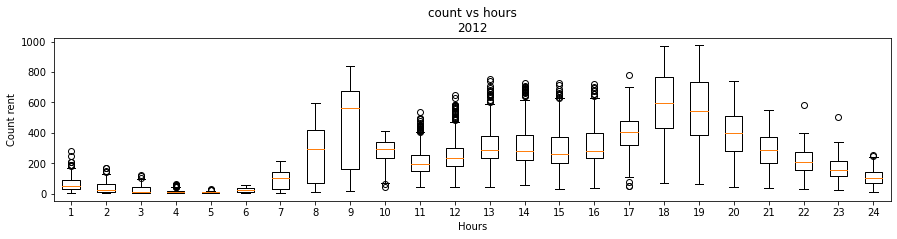

In [18]:
rentbox(bikes[bikes.datetime.dt.year == 2011], '2011')
rentbox(bikes[bikes.datetime.dt.year == 2012], '2012')

In [19]:
bikes['hour'] = bikes.datetime.dt.hour
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


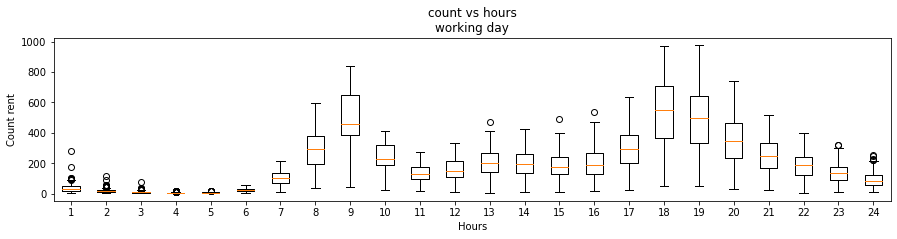

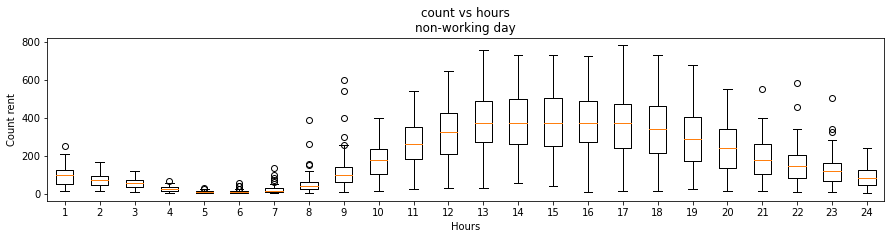

In [20]:
rentbox(bikes[bikes.workingday == 1],'working day')
rentbox(bikes[bikes.workingday == 0],'non-working day')

In [21]:
# Converting hour column into categorical form
def cattonum(x):
    if x < 6:
        return 0
    elif 6 <= x < 13:
        return 1
    elif 13 <= x < 19:
        return 2
    elif 19 <= x < 24:
        return 3

In [22]:
bikes['hour'] = bikes['hour'].apply(cattonum)
bikes_test['hour'] = bikes_test.datetime.dt.hour
bikes_test['hour'] = bikes_test['hour'].apply(cattonum)
bikes.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0


In [23]:
bikes.drop('datetime', inplace = True, axis =1)
bikes_test.drop('datetime',inplace = True, axis=1)

In [24]:
bikes.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0


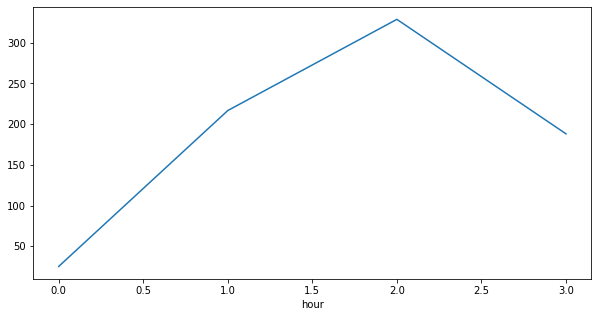

In [51]:
df = bikes.groupby('hour').mean()['count']
plt.figure(figsize = (10,5))


df.plot()

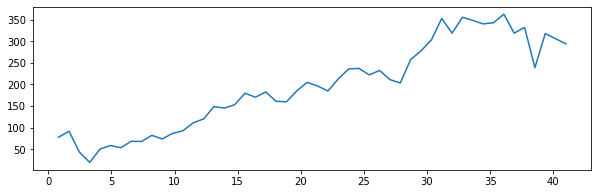

In [56]:
# count of different temp values
a = bikes.groupby('temp')[['count']].mean()
plt.figure(figsize=(10,3))
plt.plot(a)

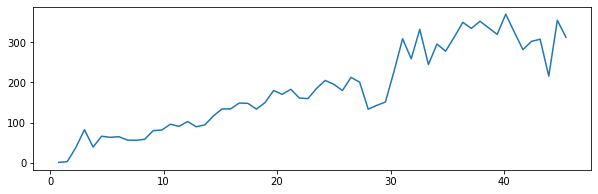

In [58]:
a = bikes.groupby('atemp')[['count']].mean()
plt.figure(figsize=(10,3))
plt.plot(a)

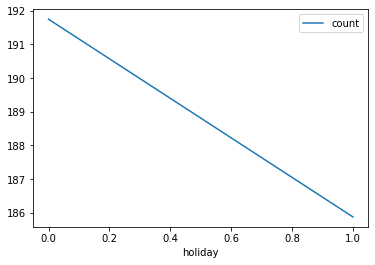

In [64]:
a = bikes.groupby('holiday')[['count']].mean()
a.plot()
plt.show()

# Model creation using sklearn

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = RandomForestRegressor(n_estimators=100) # instantiating the random Forest Regressor
score = cross_val_score(forest_reg, bikes, y = bikes, cv=4) # calcuating the cross validation score
print(score)


C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').


[0.99517924 0.99716493 0.99773609 0.99732498]


C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
